In [1]:
import kagglehub
import shutil
import os
import glob
import pandas as pd
from pprint import pprint as pp
import numpy as np

# Downloading the data from kaggle
path = kagglehub.dataset_download("muhammadroshaanriaz/time-wasters-on-social-media")

os.makedirs('./data', exist_ok=True)
if os.path.isdir(path):
    files = glob.glob(os.path.join(path, '**'), recursive=True)
    for file in files:
        if os.path.isfile(file):
            shutil.move(file, './data')
else:
    shutil.move(path, './data')
print("Path to dataset files:", './data')

df = pd.read_csv('./data/Time-Wasters on Social Media.csv')
print(f"Dataframe columns: {df.columns}")
df.drop('UserID', axis  = 1, inplace = True)
df.head()

100%|██████████| 36.0k/36.0k [00:00<00:00, 32.1MB/s]

Extracting files...
Path to dataset files: ./data
Dataframe columns: Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')


,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [2]:
df.dtypes

,0
Age,int64
Gender,object
Location,object
Income,int64
Debt,bool
Owns Property,bool
Profession,object
Demographics,object
Platform,object
Total Time Spent,int64


In [3]:
continuous_df = df[['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']]

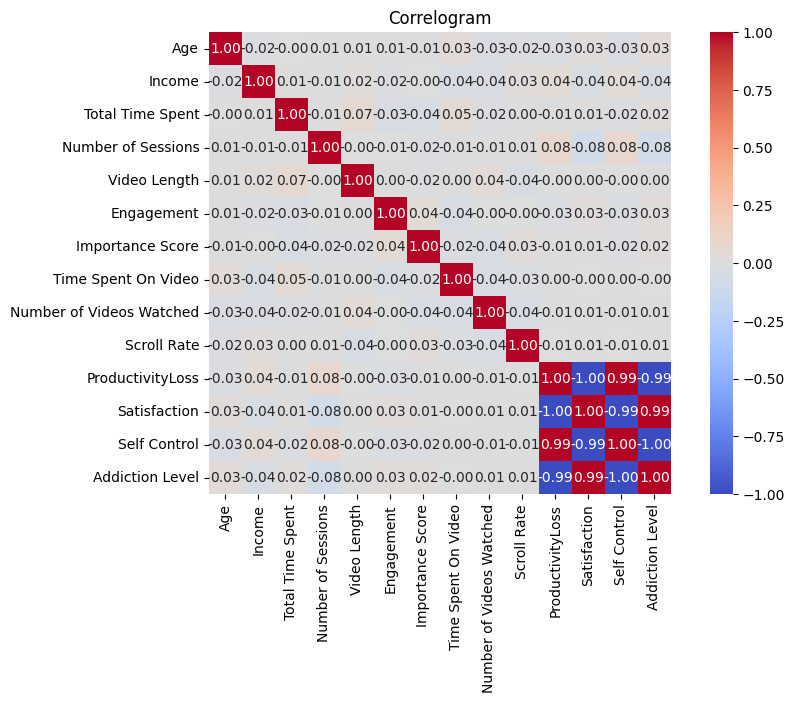

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming continuous_df is your DataFrame
# Calculate the correlation matrix
corr_matrix = continuous_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap with annotations and a color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', square=True)

# Display the plot
plt.title('Correlogram')
plt.show()

In [5]:
import pandas as pd

# Assuming 'continuous_df' is your DataFrame and 'ProductivityLoss' is the target column

# Step 1: Select columns with type 'bool' or 'object'
bool_object_columns = continuous_df.select_dtypes(include=['bool', 'object']).columns

# Step 2: Group by these columns and calculate the average ProductivityLoss
avg_productivity_loss = {}

for col in bool_object_columns:
    avg_loss = continuous_df.groupby(col)['ProductivityLoss'].mean()
    avg_productivity_loss[col] = avg_loss

# Step 3: Display the results
for col, avg_loss in avg_productivity_loss.items():
    print(f"Average ProductivityLoss for each value in '{col}':")
    print(avg_loss)
    print("\n")

<ipython-input-6-75ba6a99ff13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-6-75ba6a99ff13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-6-75ba6a99ff13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-6-75ba6a99ff13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

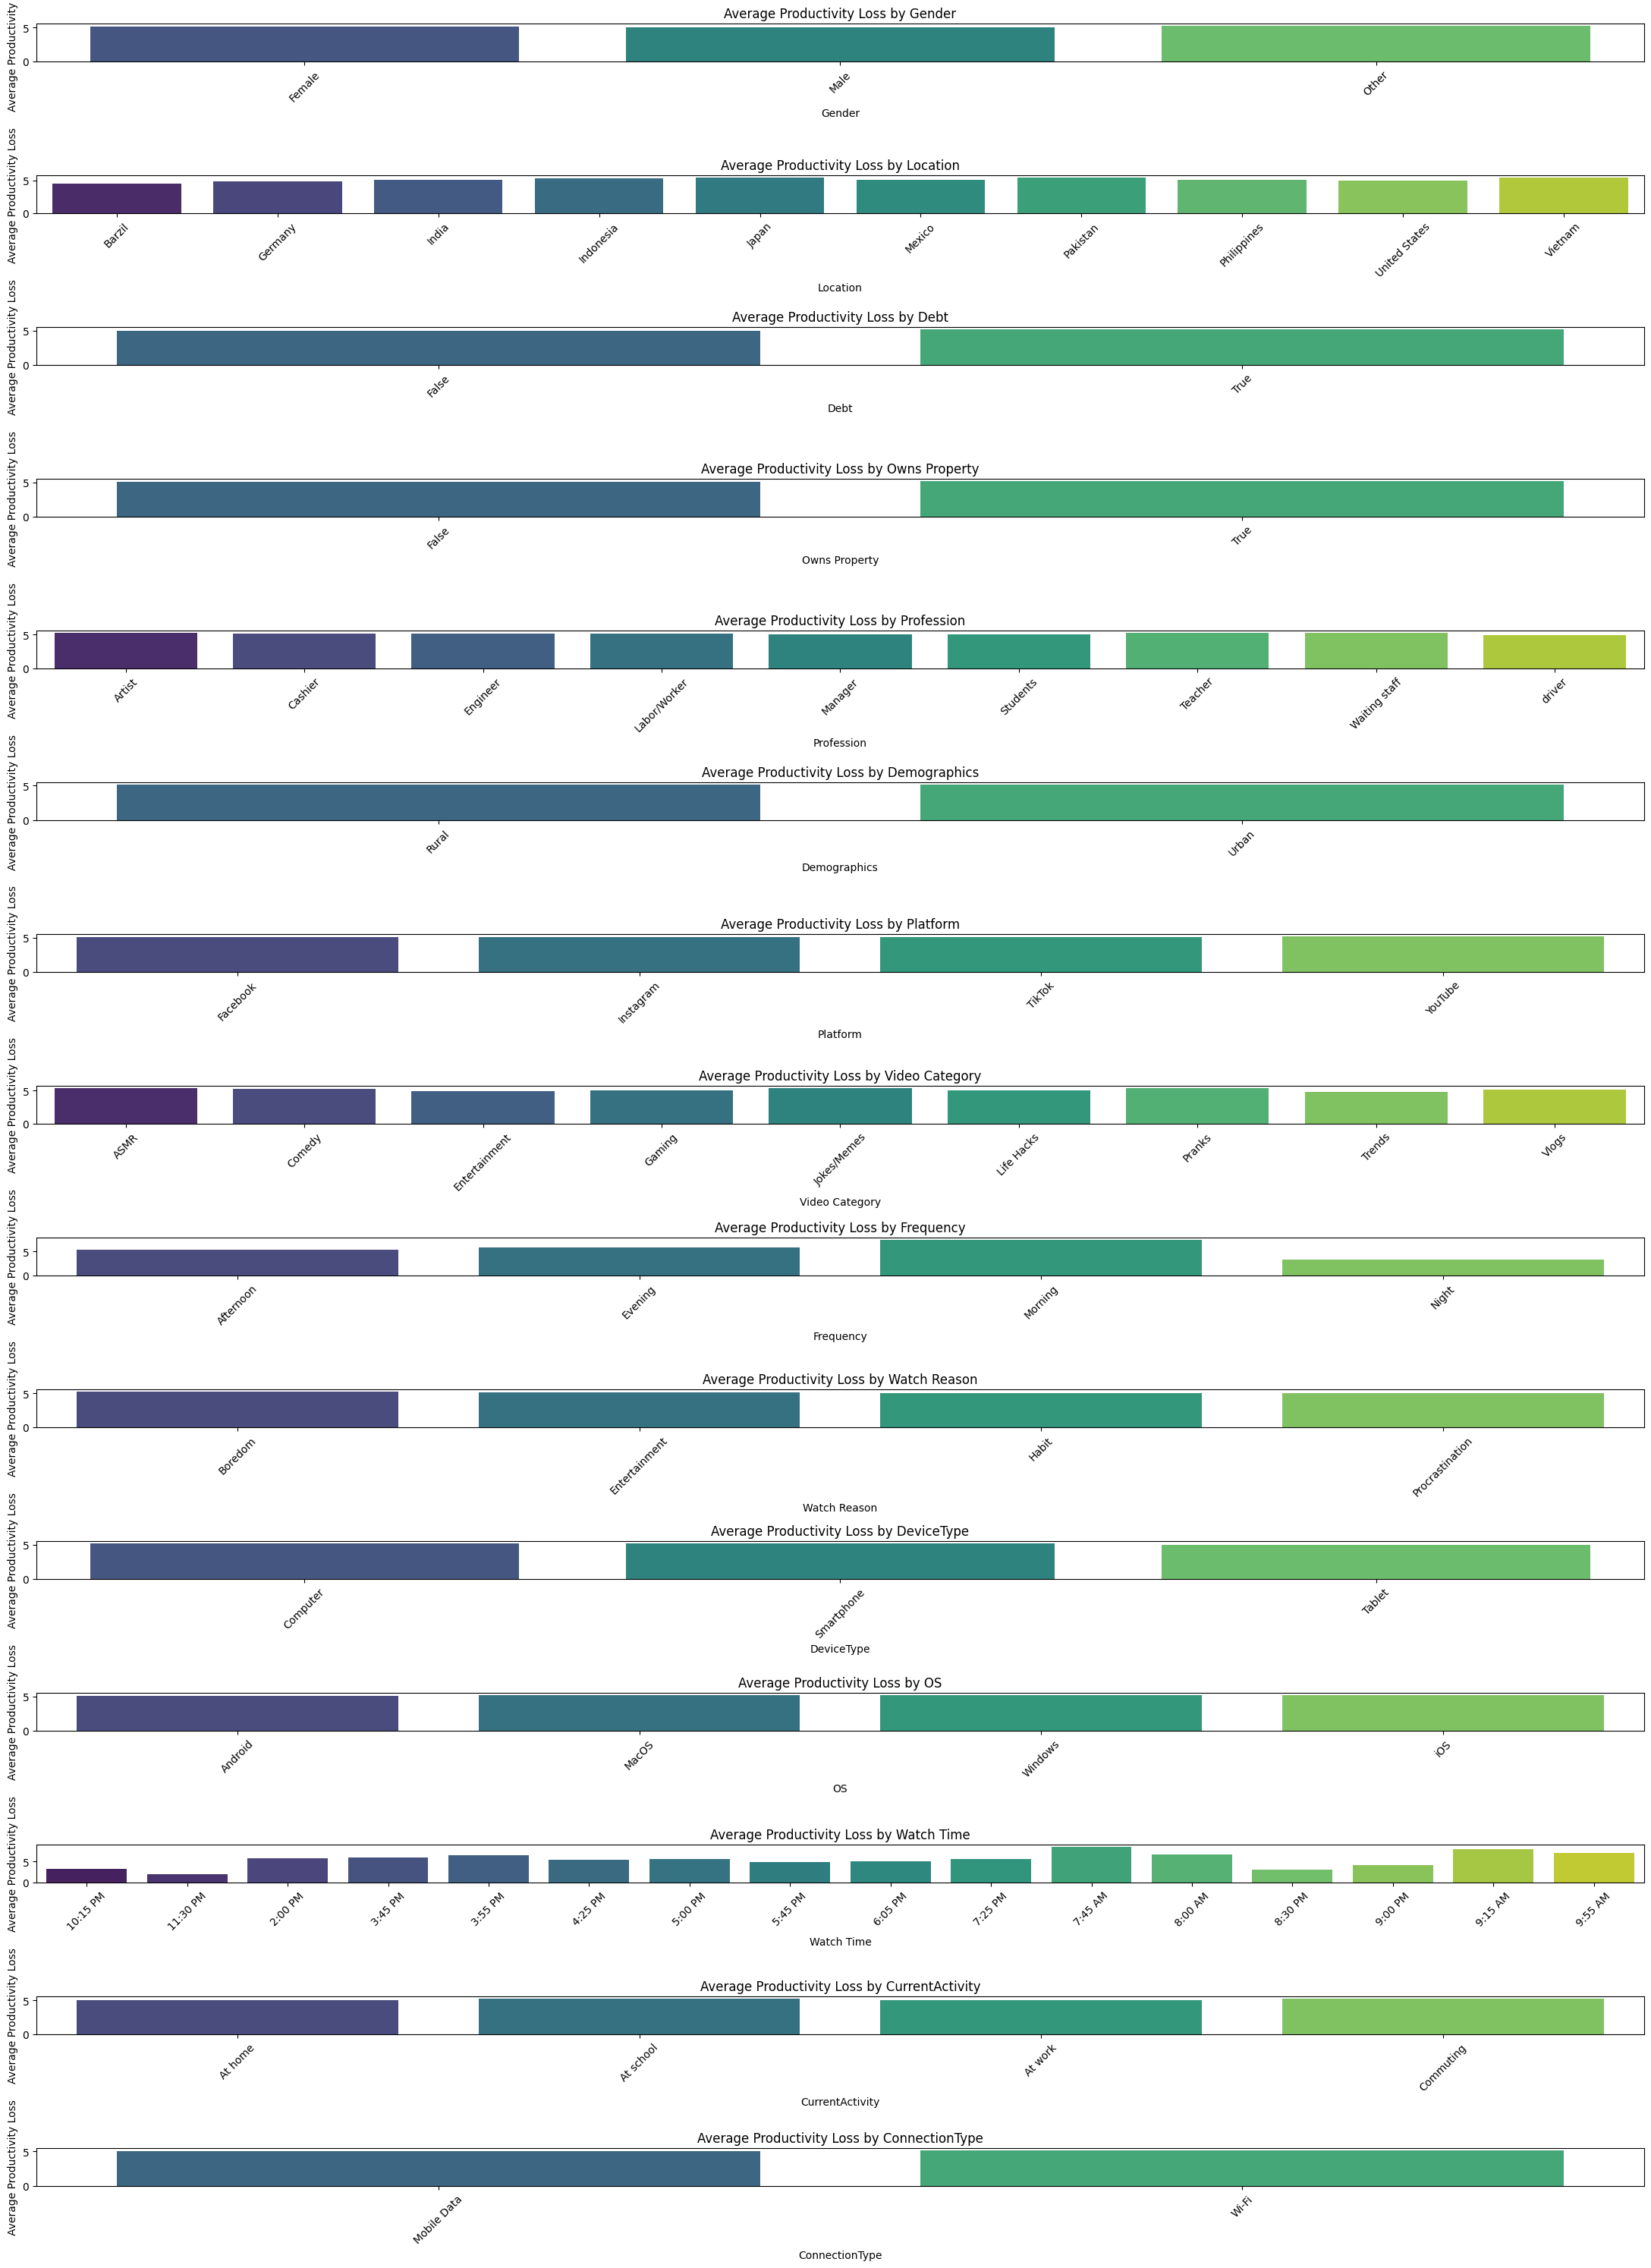

In [6]:
# Step 1: Select columns with type 'bool' or 'object'
bool_object_columns = df.select_dtypes(include=['bool', 'object']).columns

# Step 2: Plot average ProductivityLoss for each unique value of these columns
plt.figure(figsize=(22, 30))

# Create subplots with a single column but multiple rows
for idx, col in enumerate(bool_object_columns):
    # Calculate average productivity loss for each unique value in the column
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()

    # Create a subplot for each variable
    plt.subplot(len(bool_object_columns), 1, idx + 1)
    sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    # Set title and labels for each subplot
    plt.title(f'Average Productivity Loss by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Productivity Loss')

    # Rotate x-axis labels if they are categorical
    plt.xticks(rotation=45)

# Adjust layout to ensure there's no overlap
plt.tight_layout()
plt.show()


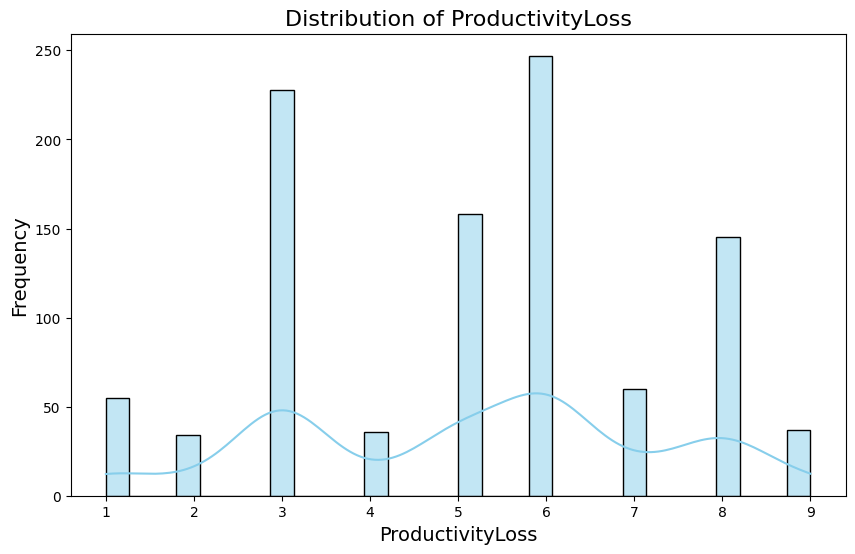

In [7]:
plt.figure(figsize=(10, 6))

# Plot a histogram of ProductivityLoss
sns.histplot(df['ProductivityLoss'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Set plot titles and labels
plt.title('Distribution of ProductivityLoss', fontsize=16)
plt.xlabel('ProductivityLoss', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

<ipython-input-8-d19a3e2622c7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-8-d19a3e2622c7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-8-d19a3e2622c7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')


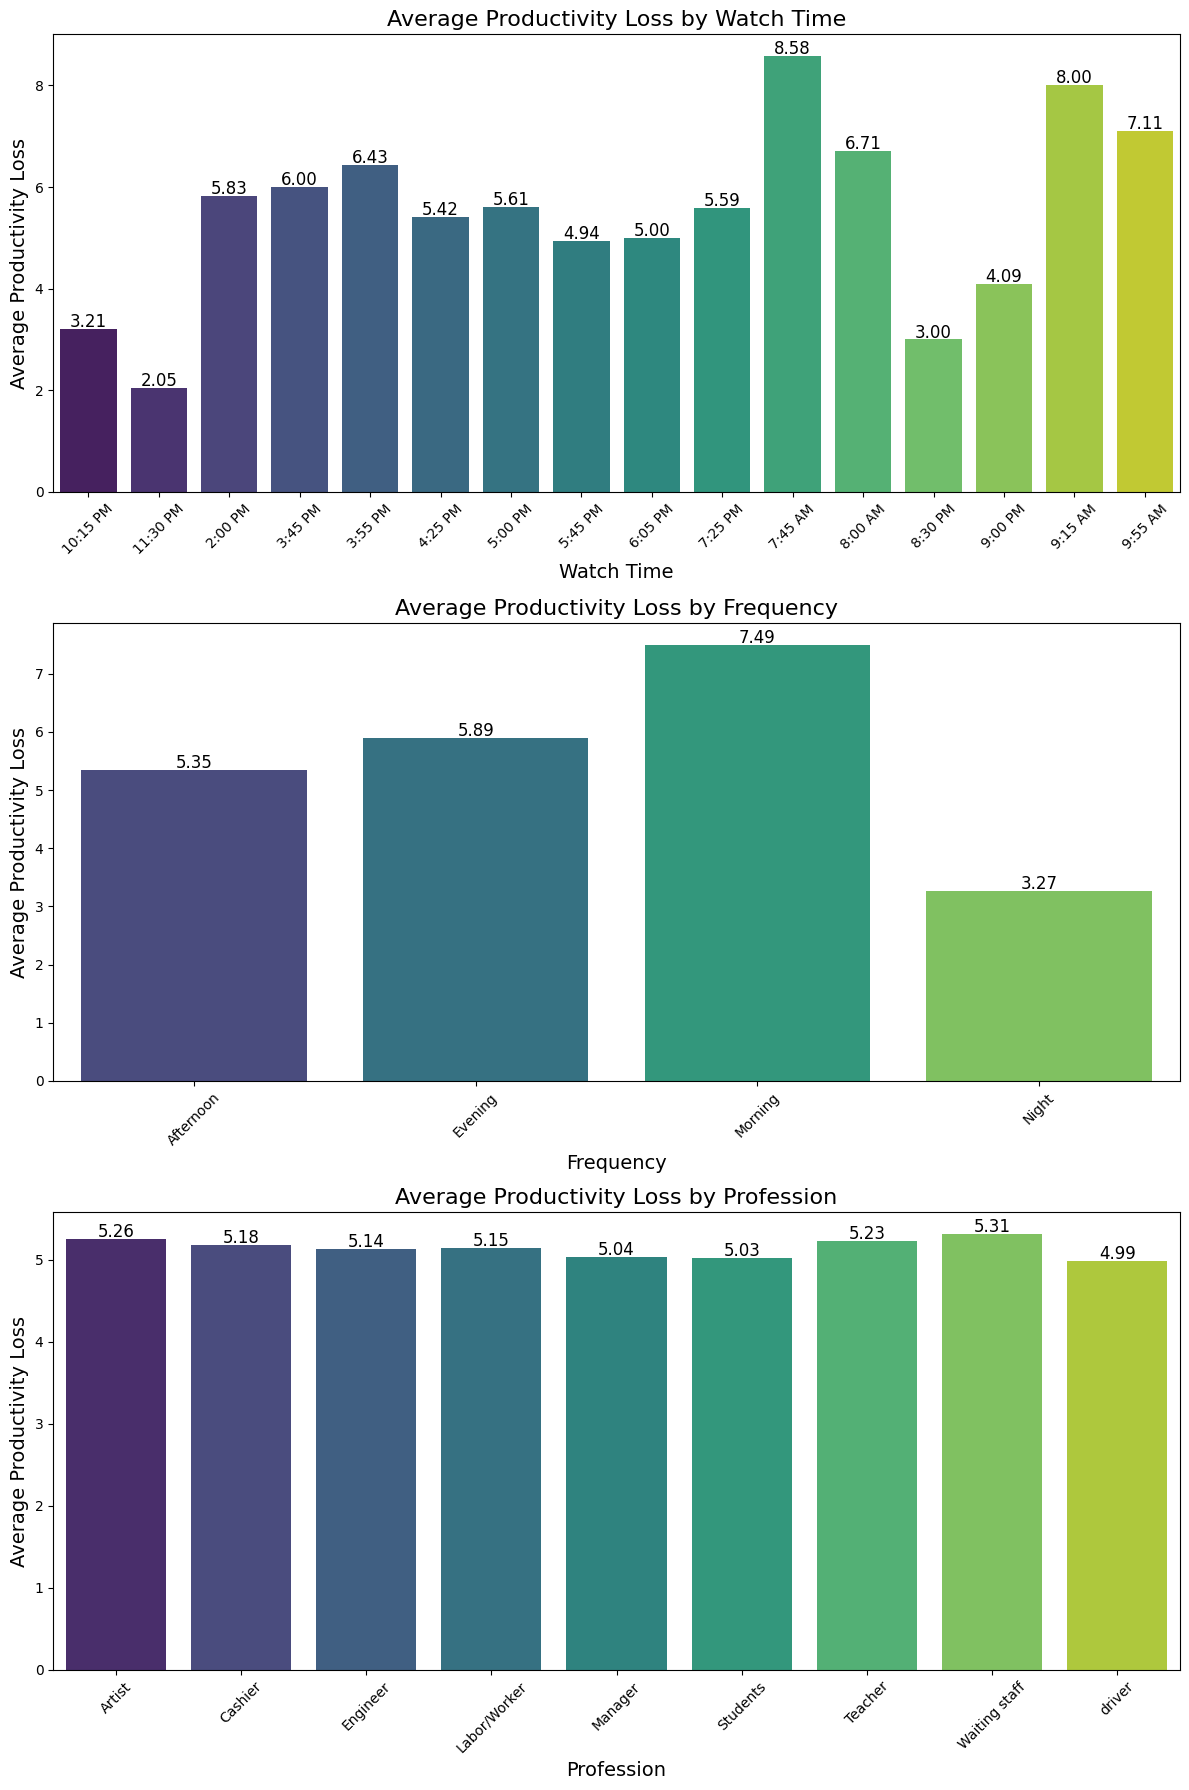

In [8]:
selected_columns = ['Watch Time', 'Frequency', 'Profession']

# Step 2: Create a large figure to accommodate the plots
plt.figure(figsize=(12, 18))

# Step 3: Create subplots for each selected variable
for idx, col in enumerate(selected_columns):
    # Calculate average productivity loss for each unique value in the column
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()

    # Create a subplot for each variable
    plt.subplot(len(selected_columns), 1, idx + 1)
    ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    # Set title and labels for each subplot
    plt.title(f'Average Productivity Loss by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Average Productivity Loss', fontsize=14)

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()